# Read data from xlsx

In [12]:
from __future__ import division, generators, absolute_import, print_function

# Table 2: some statistics

In [40]:
from openpyxl import load_workbook
data_dir = '../data/'
wb  = load_workbook(data_dir + 'Bishayee Colony Counts 10.27.97-3.8.01.xlsx') 
# print(wb.get_sheet_names())
ws = wb.get_sheet_by_name('Sheet1')
print(ws['A1'].value)
rawData = []
for i in range(4, 1366):
    tmp = [ws['D' + str(i)].value, ws['E' + str(i)].value, ws['F' + str(i)].value]
    if isinstance(tmp[0], (int, int)) & isinstance(tmp[1], (int, int)) & isinstance(tmp[2], (int, int)):
        rawData.append(tmp)
print(len(rawData))
sortData = rawData
for i in range(len(sortData)):
    sortData[i].sort()

cleanData1 = [x for x in sortData if x[0] <= x[2] - 2]
print(len(cleanData1))
print(len([x for x in cleanData1 if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

Bishayee Colony Counts 128 experiments
1361
1343
690


In [41]:
from openpyxl import load_workbook
data_dir = '../data/'
wb = load_workbook(data_dir + 'Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx') 
ws = wb.get_sheet_by_name('Sheet1')
print(ws['A1'].value, ws['C1'].value)
rawData = []
for i in range(3, 623):
    tmp = [ws['D' + str(i)].value, ws['E' + str(i)].value, ws['F' + str(i)].value]
    if isinstance(tmp[0], (int, int)) & isinstance(tmp[1], (int, int)) & isinstance(tmp[2], (int, int)):
        rawData.append(tmp)
print(len(rawData))
sortData = rawData
for i in range(len(sortData)):
    sortData[i].sort()

cleanData2 = [x for x in sortData if x[0] <= x[2] - 2]
print(len(cleanData2))
print(len([x for x in cleanData2 if x[1] == round((x[0] + x[1] + x[2])/3.) ]))

Others in Howell lab 62 experiments
596
577
109


### Figure 1:

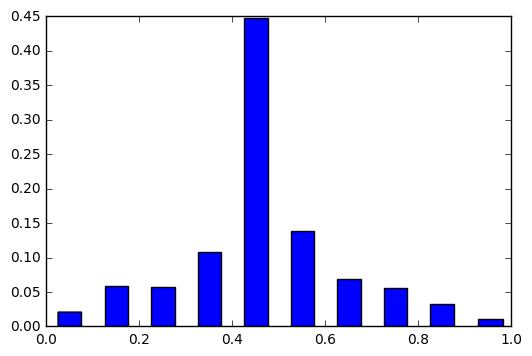

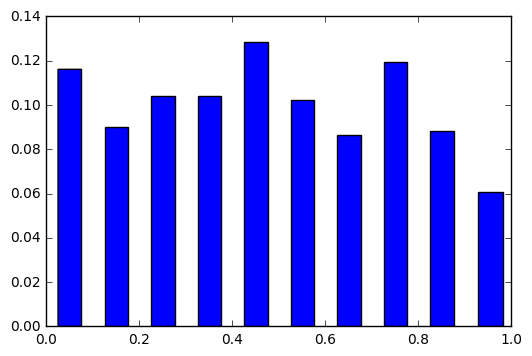

In [36]:
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

tmp1 = [(x[1] - x[0])*1.0/max(x[2] - x[0],1) for x in cleanData1]
tmp2 = [(x[1] - x[0])*1.0/max(x[2] - x[0],1) for x in cleanData2]
counts, bins, ignored = plt.hist(tmp1, [0, .101, .201, .301, .401, .501, .601, .701, .801, .901, 1.01], rwidth=0.5, weights=np.zeros_like(tmp1) + 1. / len(tmp1))
plt.show()
counts, bins, ignored = plt.hist(tmp2, [0, .101, .201, .301, .401, .501, .601, .701, .801, .901, 1.01], rwidth=0.5, weights=np.zeros_like(tmp2) + 1. / len(tmp2))
plt.show()
# print(bins)
# print(counts)

** Unresolved issues: **
* notice: must delete those with gap smaller than 2.
* the figure looks a little bit different from (a), see 0.3 and 0.9
* (b)

### Table 1:

In [1]:
from scipy.stats import poisson
import numpy as np

In [2]:
def calc_P(i):
    P = 0
    # N is the truncation number of Poisson
    N = int(poisson.ppf(1 - 1e-9, i))
    for j in range(2, N):
        for k in range(j, N):
            P += 6 * poisson.pmf(k - j, i) * poisson.pmf(k, i) * poisson.pmf(k - int(j/2), i)
            # just to follow the usage in Yu's code, I add int in poisson.pmf(k - int(j/2), i),
            # do we really need to round the number?
            if j % 2 == 1:
                P += 6 * poisson.pmf(k - j, i) * poisson.pmf(k, i) * poisson.pmf(k - int(j/2) - 1, i)
    return P

In [3]:
def calc_P_new(i):
    P = 0
    # N is the truncation number of Poisson
    Nmax = int(poisson.ppf(1 - 1e-10, i))
    Nmin = int(poisson.ppf(1e-10, i))
    for mid in range(Nmin, Nmax):
        tmp  = poisson.pmf(mid, i)
        P += 3 * tmp * (poisson.pmf(2 * mid, 2 * i) - tmp**2)
        P += 3 * tmp * (poisson.pmf(2 * mid + 1, 2 * i) - 2 * tmp * poisson.pmf(mid + 1, i))
        P += 3 * tmp * (poisson.pmf(2 * mid - 1, 2 * i) - 2 * tmp * poisson.pmf(mid - 1, i))
    return P

In [27]:
import time
lamMax  = 2000
para = np.concatenate((np.arange(1,2001), np.arange(2100,10001,100), np.arange(11000,60000,1000)))
# P = [calc_P(i) for i in range(1, lamMax)]
start = time.time()
P_new = [calc_P_new(i) for i in para]
end   = time.time()
# print(P)
# print(P_new)
print(end - start)
# poisson.ppf(1 - 1e-9, 1000)

402.67588901519775


In [75]:
# Write mid probability to txt
#P_to_txt = [[lam, P_new[lam-1]] for lam in range(1,len(P_new))]
P_to_txt = [[para[i], P_new[i]] for i in range(len(para))]
output_dir = "../outputs/"

with open(output_dir + "MidProb.txt", 'w') as f:
    for item in P_to_txt:
        f.write('\t'.join(map(repr, item)) + '\n')

** Reflection: **

* Did not include the prob that small = medium = big and no justification.

* Poisson distribution with same mean is not very convincing. Can be more non-parametric (bootstrap from other people's data).

### Hypothesis testing I:

In [15]:
from scipy.stats import binom
print(1 - binom.cdf(690 - 1, 1343, 0.42))
print(1 - binom.cdf(109 - 1,  572, 0.13))

2.85338419559e-12
2.82052399667e-05


** Reflection: **
    
* It is not reasonable to consider binomial: some experiments might be correlated. 

* It will be of interest to check the p-value of other people. What if it is significant as well?